In [1]:
import open3d as o3d
import numpy as np
from PIL import Image

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [19]:
number = 101
mask = np.load(f'dl_challenge/{number:03d}/mask.npy')
pc = np.load(f'dl_challenge/{number:03d}/pc.npy')
img_rgb = Image.open(f'dl_challenge/{number:03d}/rgb.jpg')
img_np = np.array(img_rgb)

In [20]:
print(f'pc shape: {pc.shape}')
print(f'mask shape: {mask.shape}')
print(f'img_rgb       shape: {img_np.shape}')

pc shape: (3, 420, 634)
mask shape: (1, 420, 634)
img_rgb       shape: (420, 634, 3)


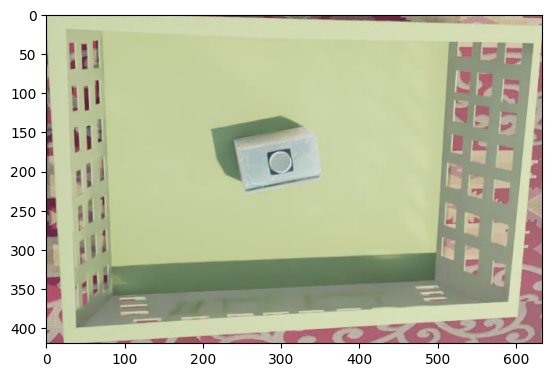

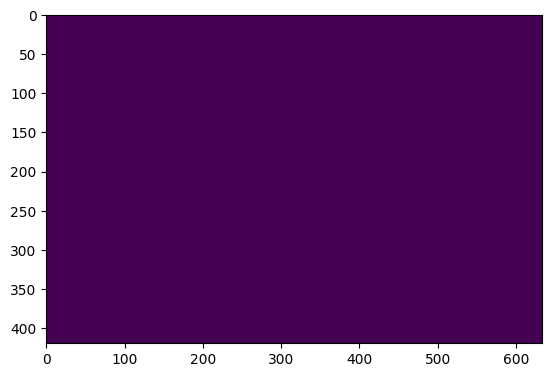

single_mask shape: (420, 634)
image shape: (420, 634, 3)


In [21]:
# show image and mask
import matplotlib.pyplot as plt
img_np = np.array(img_rgb)
plt.imshow(img_rgb)
plt.show()
# mask shape is (20, 573, 788), where 20 is 20 channels of ture or false, need to convert to single channel
# if mask   [1] is true, then new mask is 1, otherwise 0
single_mask = np.argmax(mask, axis=0)
plt.imshow(single_mask)
plt.show()
print(f'single_mask shape: {single_mask.shape}')
print(f'image shape: {img_np.shape}')

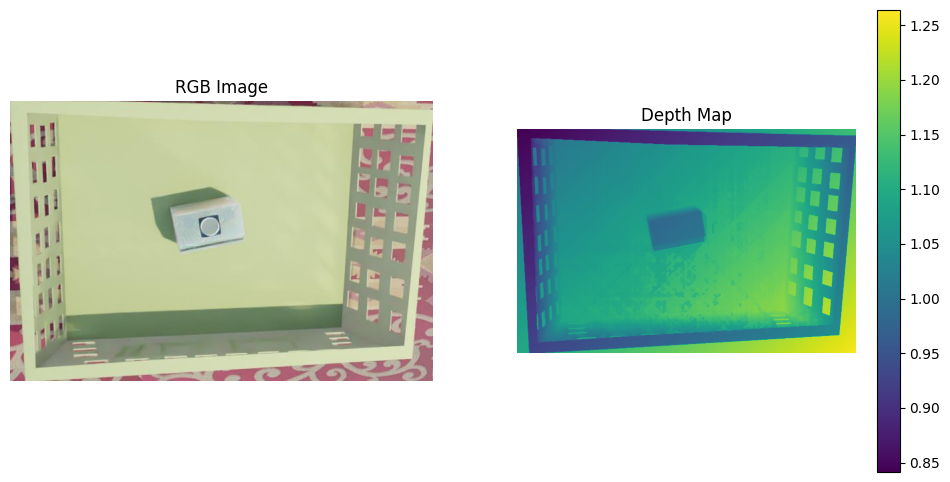

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
depth_map = pc[2]
# Plot the RGB image
axs[0].imshow(img_np)
axs[0].set_title('RGB Image')
axs[0].axis('off')

# Plot the depth map
im = axs[1].imshow(depth_map, cmap='viridis')
axs[1].set_title('Depth Map')
axs[1].axis('off')

# Add a color bar for the depth map
fig.colorbar(im, ax=axs[1])

plt.show()




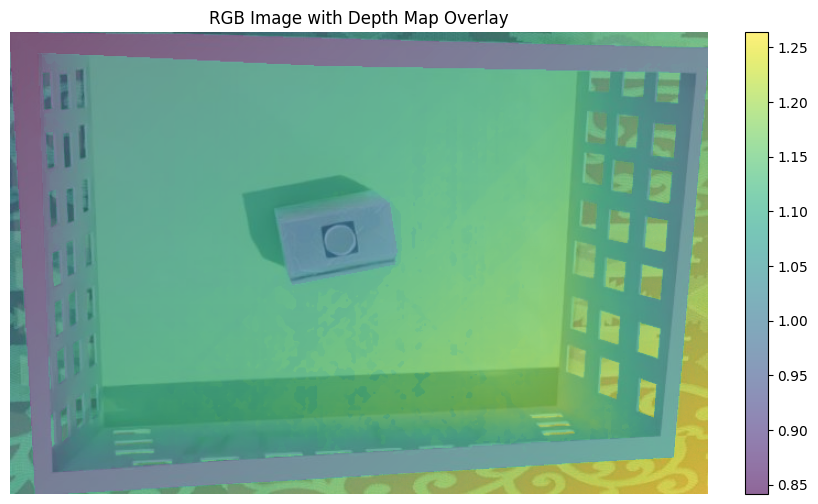

In [28]:
# Extract the depth map
depth_map = pc[2]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the RGB image
ax.imshow(img_np)
ax.set_title('RGB Image with Depth Map Overlay')
ax.axis('off')

# Overlay the depth map on the RGB image with some transparency
depth_map_overlay = ax.imshow(depth_map, cmap='viridis', alpha=0.6)  # Adjust alpha as needed

# Add a color bar for the depth map
fig.colorbar(depth_map_overlay, ax=ax, fraction=0.046, pad=0.04)

# Show the plot
plt.show()